<a href="https://colab.research.google.com/github/Joacco11/AluraStore/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [84]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

#1. Análisis de facturación



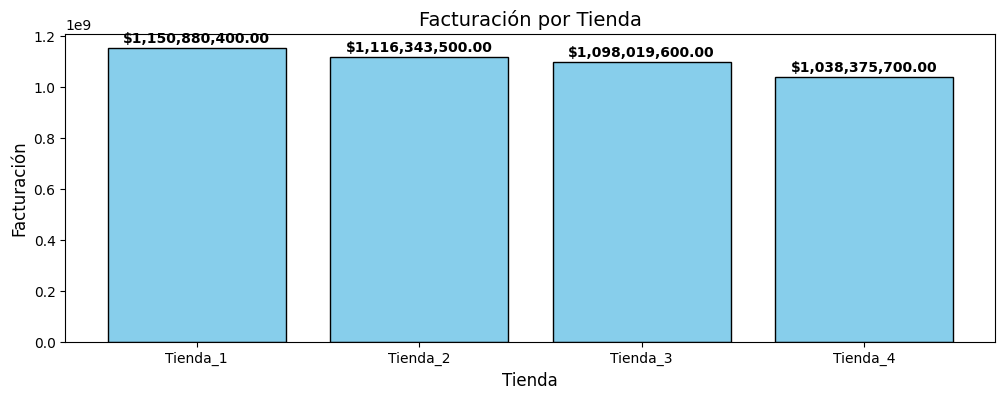

In [82]:
def facturacion_total():
    # Calcular facturación por tienda
    facturacion_1 = tienda['Precio'].sum()
    facturacion_2 = tienda2['Precio'].sum()
    facturacion_3 = tienda3['Precio'].sum()
    facturacion_4 = tienda4['Precio'].sum()

    facturacionXTienda = {
        'Tienda_1': facturacion_1,
        'Tienda_2': facturacion_2,
        'Tienda_3': facturacion_3,
        'Tienda_4': facturacion_4
    }

    # Crear gráfico de barras
    plt.figure(figsize=(12, 4))
    barras = plt.bar(facturacionXTienda.keys(), facturacionXTienda.values(),
                     color='skyblue', edgecolor='black')

    # Título y ejes
    plt.title("Facturación por Tienda", fontsize=14)
    plt.xlabel("Tienda", fontsize=12)
    plt.ylabel("Facturación", fontsize=12)
    # Agregar etiquetas encima de cada barra
    for barra in barras:
        altura = barra.get_height()
        plt.text(barra.get_x() + barra.get_width()/2, altura + (altura * 0.01),
                 f"${altura:,.2f}", ha='center', va='bottom',
                 fontsize=10, fontweight='bold')
    plt.show()
facturacion_total()

# 2. Ventas por categoría

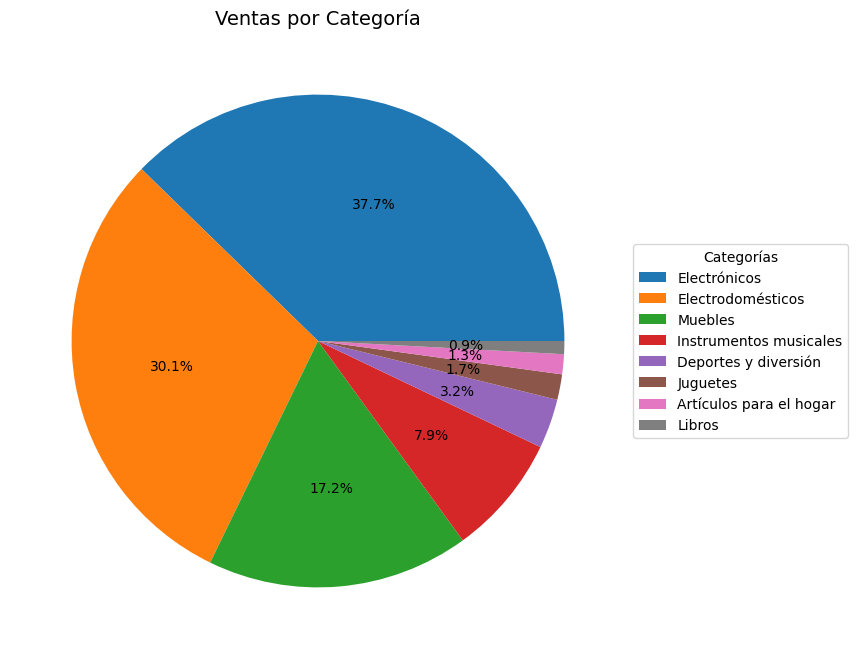

In [81]:
def ventas_por_categoria():
  # Unir todos los DataFrames en uno solo
  tiendas_combinadas = pd.concat([tienda, tienda2, tienda3, tienda4])

  # Agrupar por categoría y sumar ventas
  ventas_por_categoria = tiendas_combinadas.groupby('Categoría del Producto')['Precio'].sum().reset_index()

  # Ordenar de mayor a menor
  ventas_por_categoria = ventas_por_categoria.sort_values(by='Precio', ascending=False)
  plt.figure(figsize=(8,8))
  plt.pie(
    ventas_por_categoria['Precio'],
    autopct='%1.1f%%',
  )

  # Leyenda
  plt.legend(
      ventas_por_categoria['Categoría del Producto'],
      title="Categorías",
      loc="center left",
      bbox_to_anchor=(1, 0.5)
  )
  # Título
  plt.title("Ventas por Categoría", fontsize=14)
  plt.show()
ventas_por_categoria()

In [89]:
tiendas_combinadas = pd.concat([tienda, tienda2, tienda3, tienda4])
tiendas_combinadas.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


# 3. Calificación promedio de la tienda


In [37]:
def calificacion_promedio():
  # Calcular calificación promedio por tienda
  calif_tienda1 = tienda['Calificación'].mean()
  calif_tienda2 = tienda2['Calificación'].mean()
  calif_tienda3 = tienda3['Calificación'].mean()
  calif_tienda4 = tienda4['Calificación'].mean()

  # Crear DataFrame con resultados
  calificaciones = pd.DataFrame({
      'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
      'Calificación Promedio': [calif_tienda1, calif_tienda2, calif_tienda3, calif_tienda4]
  })

  # Ordenar de mayor a menor calificación
  calificaciones = calificaciones.sort_values(by='Calificación Promedio', ascending=False)

  plt.figure(figsize=(8,5))
  barras = plt.barh(calificaciones['Tienda'], calificaciones['Calificación Promedio'], color='lightgreen', edgecolor='black')

  # Etiquetas y título
  plt.xlabel("Calificación Promedio")
  plt.title("Calificación Promedio por Tienda", fontsize=14)
  plt.xlim(0, 5)  # Escala de calificación (asumiendo de 1 a 5)
  plt.grid(axis='x', linestyle='--', alpha=0.7)

  # Mostrar valores en cada barra
  for barra in barras:
      plt.text(barra.get_width() + 0.05, barra.get_y() + barra.get_height()/2,
              f"{barra.get_width():.2f}", va='center', fontsize=10, fontweight='bold')

  plt.show()

# 4. Productos más y menos vendidos

In [ ]:
def productos_mas_menos_vendidos():
  # Unir todos los DataFrames
  tiendas_combinadas = pd.concat([tienda, tienda2, tienda3, tienda4])

  # Contar ventas por producto
  ventas_por_producto = tiendas_combinadas['Producto'].value_counts().reset_index()
  ventas_por_producto.columns = ['Producto', 'Cantidad de Ventas']

  # Calcular porcentaje
  total_ventas = ventas_por_producto['Cantidad de Ventas'].sum()
  ventas_por_producto['Porcentaje'] = (ventas_por_producto['Cantidad de Ventas'] / total_ventas) * 100

  # Formatear a 3 decimales
  ventas_por_producto['Porcentaje'] = ventas_por_producto['Porcentaje'].round(3)

  # Top 5 más vendidos (DataFrame)
  mas_vendidos = ventas_por_producto.head(5)

  # Top 5 menos vendidos (DataFrame)
  menos_vendidos = ventas_por_producto.tail(5)

  # Mostrar tablas en formato pandas
  print("📈 Productos más vendidos:")
  display(mas_vendidos)

  print("📉 Productos menos vendidos:")
  display(menos_vendidos)


# 5. Envío promedio por tienda

In [54]:
def envio_promedio():
    # Calcular costo de envío promedio por tienda
    envio_tienda1 = tienda['Costo de envío'].mean()
    envio_tienda2 = tienda2['Costo de envío'].mean()
    envio_tienda3 = tienda3['Costo de envío'].mean()
    envio_tienda4 = tienda4['Costo de envío'].mean()

    # Crear DataFrame con resultados
    df_envio = pd.DataFrame({
        'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
        'Envío Promedio': [envio_tienda1, envio_tienda2, envio_tienda3, envio_tienda4]
    })

    # Ordenar y redondear
    df_envio = df_envio.sort_values(by='Envío Promedio', ascending=False)
    df_envio['Envío Promedio'] = df_envio['Envío Promedio'].round(2)

    # Devolver solo la tabla estilizada
    return df_envio.style.format({
        'Envío Promedio': 'S/. {:.2f}'
    }).background_gradient(subset='Envío Promedio', cmap='RdYlGn_r')

envio_promedio()

,Tienda,Envío Promedio
0,Tienda 1,S/. 26018.61
1,Tienda 2,S/. 25216.24
2,Tienda 3,S/. 24805.68
3,Tienda 4,S/. 23459.46


# 6. Sistema Final


In [ ]:
while True:
    print("\n===== MENÚ ALURA STORE =====")
    print("1. Facturación total por tienda")
    print("2. Ventas por categoría")
    print("3. Calificación promedio por tienda")
    print("4. Productos más y menos vendidos")
    print("5. Envío promedio por tienda")
    print("0. Salir")

    try:
        opcion = int(input("Elige una opción (0-5): "))
        if opcion == 0:
            print("Saliendo del sistema...")
            break
        elif opcion == 1:
            facturacion_total()
        elif opcion == 2:
            ventas_por_categoria()
        elif opcion == 3:
            calificacion_promedio()
        elif opcion == 4:
            productos_mas_menos_vendidos()
        elif opcion == 5:
            envio_promedio()
        else:
            raise ValueError("Opción fuera de rango.")
    except ValueError as e:
        print(f"Error: {e}. Intenta de nuevo ingresando un número válido.")
    except Exception as e:
        print(f"Ocurrió un error inesperado: {e}")